In [10]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/prob2-cummins/Social Media Usage - Test.xlsm
/kaggle/input/prob2-cummins/Social Media Usage - Test_updated.xlsm
/kaggle/input/prob2-cummins/Sleep Dataset.xlsm
/kaggle/input/prob2-cummins/Social Media Usage - Train.xlsm
/kaggle/input/prob2-cummins/Social Media Usage - Val.xlsm
/kaggle/input/prob2-cummins/Social Media Usage - Val_updated.xlsm
/kaggle/input/prob2-cummins/updated_social_media_usage_train.xlsm


In [11]:
# import pandas as pd

# # Load both CSV files
# df1 = pd.read_excel("/kaggle/input/prob2-cummins/updated_social_media_usage_train.xlsm")
# df2 = pd.read_excel("/kaggle/input/prob2-cummins/Social Media Usage - Val_updated.xlsm")

# # Concatenate (stack rows)
# df_combined = pd.concat([df1, df2], ignore_index=True)

# # Save the merged file
# df_combined.to_csv("combined_file.csv", index=False)

# # Display first few rows
# print(df_combined.head())
df_combined=pd.read_excel("/kaggle/input/prob2-cummins/updated_social_media_usage_train.xlsm")

In [12]:
df_combined=df_combined.dropna()

In [13]:
df_combined.drop('User_ID',axis=1)

,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
1,25.0,Female,Instagram,120.0,3.0,45.0,10.0,12.0,Happiness
3,30.0,Male,Twitter,90.0,5.0,20.0,25.0,30.0,Anger
5,22.0,Non-binary,Facebook,60.0,2.0,15.0,5.0,20.0,Neutral
7,28.0,Female,Instagram,200.0,8.0,100.0,30.0,50.0,Anxiety
9,33.0,Male,LinkedIn,45.0,1.0,5.0,2.0,10.0,Boredom
...,...,...,...,...,...,...,...,...,...
1991,33.0,Non-binary,Twitter,85.0,4.0,35.0,18.0,18.0,Boredom
1993,22.0,Female,Facebook,70.0,1.0,14.0,6.0,10.0,Neutral
1995,35.0,Male,Whatsapp,110.0,3.0,50.0,25.0,25.0,Happiness
1997,28.0,Non-binary,Telegram,60.0,2.0,18.0,8.0,18.0,Anger



Most Frequent Emotion per Platform:
    Platform Most_Frequent_Emotion
0   Facebook               Neutral
1  Instagram             Happiness
2   LinkedIn               Boredom
3   Snapchat               Sadness
4   Telegram               Neutral
5    Twitter                 Anger
6   Whatsapp                 Anger


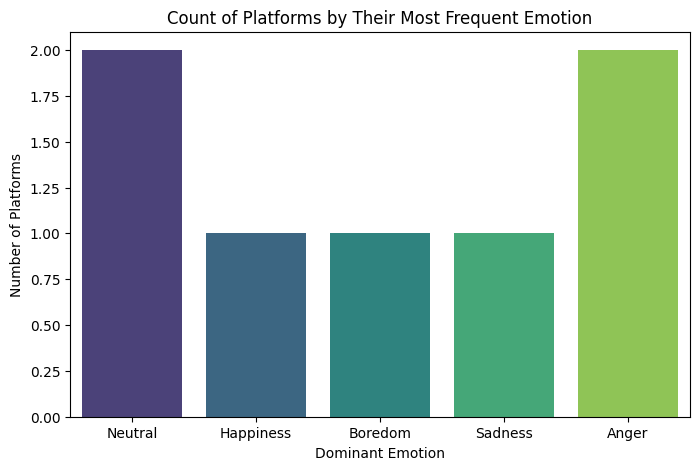

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Get most frequent (dominant) emotion per platform
dominant_emotion_per_platform = (
    df_combined.groupby("Platform")["Dominant_Emotion"]
    .agg(lambda x: x.value_counts().idxmax())
    .reset_index()
    .rename(columns={"Dominant_Emotion": "Most_Frequent_Emotion"})
)

# Optional: If Dominant_Emotion was encoded, decode it using label encoder
# dominant_emotion_per_platform["Most_Frequent_Emotion"] = label_encoders["Dominant_Emotion"].inverse_transform(
#     dominant_emotion_per_platform["Most_Frequent_Emotion"]
# )

# Step 2: Print the result
print("\nMost Frequent Emotion per Platform:")
print(dominant_emotion_per_platform)

# Step 3: Plot as count of platforms per dominant emotion (summary)
plt.figure(figsize=(8, 5))
sns.countplot(data=dominant_emotion_per_platform, x="Most_Frequent_Emotion", palette="viridis")
plt.title("Count of Platforms by Their Most Frequent Emotion")
plt.xlabel("Dominant Emotion")
plt.ylabel("Number of Platforms")
plt.show()


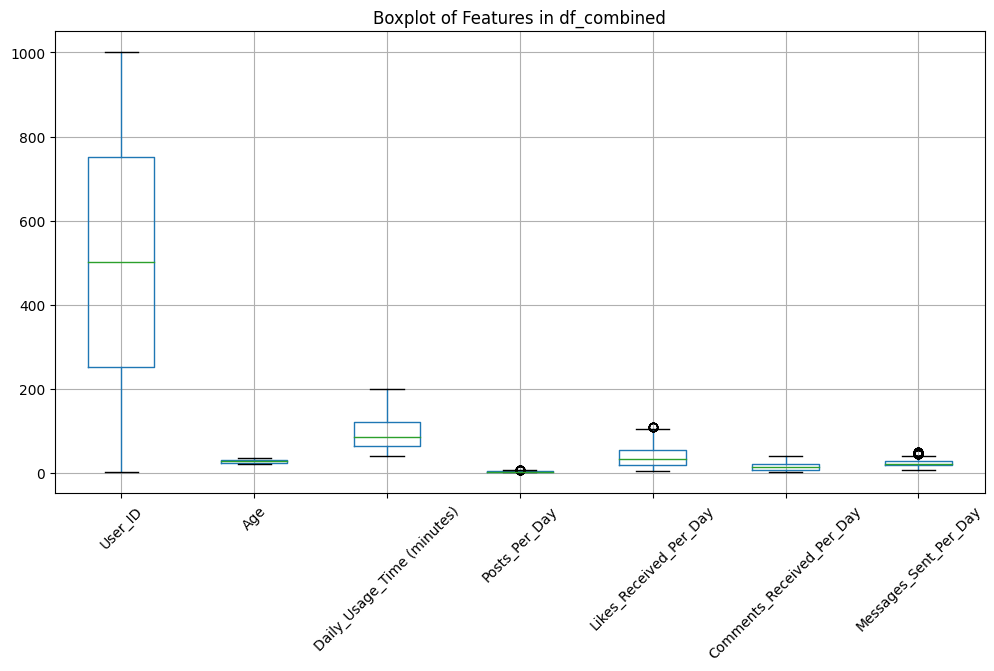

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
df_combined.boxplot()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title("Boxplot of Features in df_combined")
plt.show()


In [16]:
df_test=pd.read_excel("/kaggle/input/prob2-cummins/Social Media Usage - Val_updated.xlsm")

In [17]:
df_test.dropna(inplace=True)
df_test.drop('User_ID',axis=1)

,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
1,31,Male,Instagram,170.0,5.0,80.0,20.0,35,Happiness
3,32,Female,Instagram,155.0,6.0,75.0,25.0,38,Happiness
5,26,Non-binary,Facebook,45.0,1.0,8.0,4.0,12,Sadness
7,28,Non-binary,Snapchat,115.0,3.0,38.0,18.0,27,Anxiety
9,28,Non-binary,Snapchat,115.0,3.0,38.0,18.0,27,Anxiety
...,...,...,...,...,...,...,...,...,...
287,27,Non-binary,LinkedIn,55.0,1.0,9.0,2.0,11,Anxiety
289,26,Non-binary,Facebook,45.0,1.0,8.0,4.0,12,Sadness
291,29,Female,LinkedIn,55.0,2.0,15.0,5.0,10,Neutral
293,21,Female,Facebook,75.0,2.0,25.0,13.0,19,Anxiety


----

In [18]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# plt.figure(figsize=(12, 6))
# sns.boxplot(x=df_combined["Dominant_Emotion"], y=df_combined["Engagement_Received"], palette="coolwarm")
# plt.xticks(rotation=45)  # Rotate labels for readability
# plt.title("Engagement Received vs. Dominant Emotion")
# plt.xlabel("Dominant Emotion")
# plt.ylabel("Engagement Received")
# plt.show()


In [19]:
df_test["Engagement_Received"] = df_test["Likes_Received_Per_Day"] + df_test["Comments_Received_Per_Day"]

Binning fails. since theres nothing to resample


In [20]:
df_combined["Engagement_Received"] = df_combined["Likes_Received_Per_Day"] + df_combined["Comments_Received_Per_Day"]

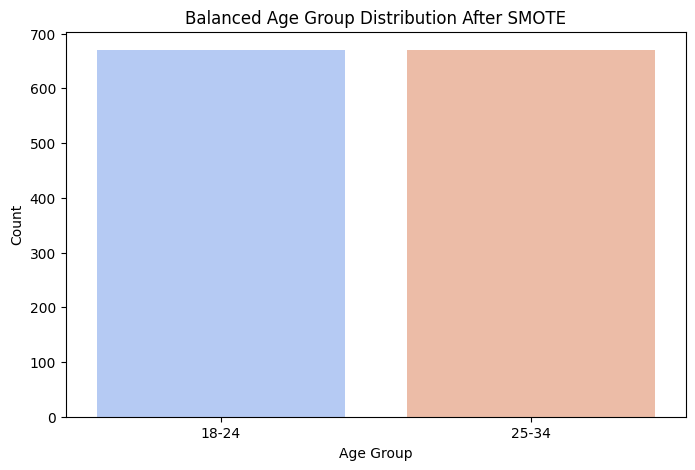


Balanced Age Group Counts:
Age_Group
18-24    670
25-34    670
Name: count, dtype: int64


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
### 1️⃣ Encode Categorical Features ###
# Convert categorical columns to numerical values for SMOTE
categorical_cols = ["Gender", "Platform", "Dominant_Emotion"]
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df_combined[col] = le.fit_transform(df_combined[col])
    label_encoders[col] = le  # Store encoder for later conversion back

# Define age bins
age_bins = [0, 18, 25, 35, 45, 55, 65, 100]
age_labels = ["<18", "18-24", "25-34", "35-44", "45-54", "55-64", "65+"]
df_combined["Age_Group"] = pd.cut(df_combined["Age"], bins=age_bins, labels=age_labels)

# Drop rows where Age_Group is NaN (if any)
df_combined = df_combined.dropna(subset=["Age_Group"])

# Encode Age_Group for SMOTE
age_encoder = LabelEncoder()
df_combined["Age_Group"] = age_encoder.fit_transform(df_combined["Age_Group"])

### 2️⃣ Apply SMOTE to Balance Age Groups ###
X = df_combined.drop(columns=["Age_Group"])  # Features
y = df_combined["Age_Group"]  # Target (Age Groups)

smote = SMOTE(sampling_strategy="auto", random_state=42)  # Generate minority class samples
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert back to DataFrame
df_balanced = pd.DataFrame(X_resampled, columns=X.columns)
df_balanced["Age_Group"] = y_resampled

# Convert back Age Groups to original labels
df_balanced["Age_Group"] = age_encoder.inverse_transform(df_balanced["Age_Group"])

# Convert categorical columns back to original values
for col, le in label_encoders.items():
    df_balanced[col] = le.inverse_transform(df_balanced[col].astype(int))

### 3️⃣ Visualizing Age Group Distribution After SMOTE ###
plt.figure(figsize=(8, 5))
sns.countplot(data=df_balanced, x="Age_Group", palette="coolwarm")
plt.title("Balanced Age Group Distribution After SMOTE")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.show()

# Print value counts
print("\nBalanced Age Group Counts:")
print(df_balanced["Age_Group"].value_counts())


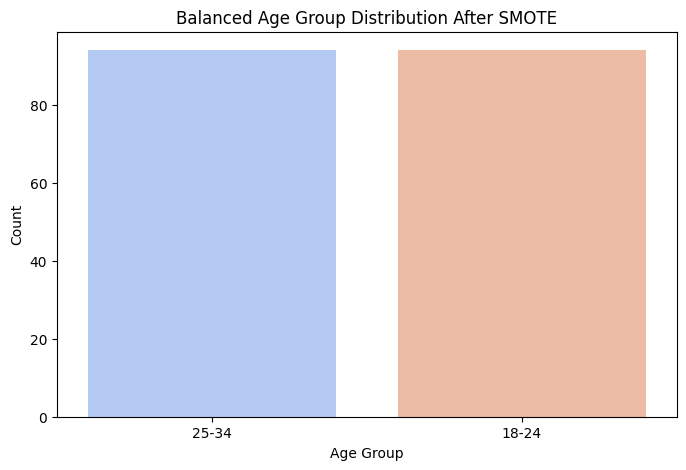


Balanced Age Group Counts:
Age_Group
25-34    94
18-24    94
Name: count, dtype: int64


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

### 1️⃣ Encode Categorical Features ###
# Convert categorical columns to numerical values for SMOTE
categorical_cols = ["Gender", "Platform", "Dominant_Emotion"]
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df_test[col] = le.fit_transform(df_test[col])
    label_encoders[col] = le  # Store encoder for later conversion back

# Define age bins
age_bins = [0, 18, 25, 35, 45, 55, 65, 100]
age_labels = ["<18", "18-24", "25-34", "35-44", "45-54", "55-64", "65+"]
df_test["Age_Group"] = pd.cut(df_test["Age"], bins=age_bins, labels=age_labels)

# Drop rows where Age_Group is NaN (if any)
df_test = df_test.dropna(subset=["Age_Group"])

# Encode Age_Group for SMOTE
age_encoder = LabelEncoder()
df_test["Age_Group"] = age_encoder.fit_transform(df_test["Age_Group"])

### 2️⃣ Apply SMOTE to Balance Age Groups ###
X = df_test.drop(columns=["Age_Group"])  # Features
y = df_test["Age_Group"]  # Target (Age Groups)

smote = SMOTE(sampling_strategy="auto", random_state=42)  # Generate minority class samples
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert back to DataFrame
df_balanced = pd.DataFrame(X_resampled, columns=X.columns)
df_balanced["Age_Group"] = y_resampled

# Convert back Age Groups to original labels
df_balanced["Age_Group"] = age_encoder.inverse_transform(df_balanced["Age_Group"])

# Convert categorical columns back to original values
for col, le in label_encoders.items():
    df_balanced[col] = le.inverse_transform(df_balanced[col].astype(int))

### 3️⃣ Visualizing Age Group Distribution After SMOTE ###
plt.figure(figsize=(8, 5))
sns.countplot(data=df_balanced, x="Age_Group", palette="coolwarm")
plt.title("Balanced Age Group Distribution After SMOTE")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.show()

# Print value counts
print("\nBalanced Age Group Counts:")
print(df_balanced["Age_Group"].value_counts())


In [23]:


df_combined.describe()

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion,Engagement_Received,Age_Group
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,27.510000,0.900000,2.530000,95.950000,3.321000,39.898000,15.611000,22.560000,2.650000,55.509000,0.670000
std,288.819436,3.930057,0.794123,2.052636,38.850442,1.914582,26.393867,8.819493,8.516274,1.646272,34.754623,0.470448
min,1.000000,21.000000,0.000000,0.000000,40.000000,1.000000,5.000000,2.000000,8.000000,0.000000,7.000000,0.000000
25%,250.750000,24.000000,0.000000,1.000000,65.000000,2.000000,20.000000,8.000000,17.750000,1.000000,28.000000,0.000000
50%,500.500000,27.500000,1.000000,2.000000,85.000000,3.000000,33.000000,14.000000,22.000000,3.000000,50.000000,1.000000
75%,750.250000,30.250000,2.000000,5.000000,120.000000,4.000000,55.000000,22.000000,28.000000,4.000000,77.000000,1.000000
max,1000.000000,35.000000,2.000000,6.000000,200.000000,8.000000,110.000000,40.000000,50.000000,5.000000,150.000000,1.000000


In [24]:
df_combined.drop(['User_ID','Age'],axis=1,inplace=True)

In [25]:
df_test.drop(['User_ID','Age'],axis=1,inplace=True)

In [26]:
df_combined

,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion,Engagement_Received,Age_Group
1,0,1,120.0,3.0,45.0,10.0,12.0,3,55.0,0
3,1,5,90.0,5.0,20.0,25.0,30.0,0,45.0,1
5,2,0,60.0,2.0,15.0,5.0,20.0,4,20.0,0
7,0,1,200.0,8.0,100.0,30.0,50.0,1,130.0,1
9,1,2,45.0,1.0,5.0,2.0,10.0,2,7.0,1
...,...,...,...,...,...,...,...,...,...,...
1991,2,5,85.0,4.0,35.0,18.0,18.0,2,53.0,1
1993,0,0,70.0,1.0,14.0,6.0,10.0,4,20.0,0
1995,1,6,110.0,3.0,50.0,25.0,25.0,3,75.0,1
1997,2,4,60.0,2.0,18.0,8.0,18.0,0,26.0,1


In [27]:
df_test["Total_Engagement"] = (
    df_test["Likes_Received_Per_Day"] +
    df_test["Comments_Received_Per_Day"] +
    df_test["Messages_Sent_Per_Day"])


In [28]:
df_combined["Total_Engagement"] = (
    df_combined["Likes_Received_Per_Day"] +
    df_combined["Comments_Received_Per_Day"] +
    df_combined["Messages_Sent_Per_Day"]
)


In [29]:
print(df_test.shape)
print(df_combined.shape)

(147, 11)
(1000, 11)


In [30]:
columns_to_drop = ["Likes_Received_Per_Day", "Comments_Received_Per_Day", "Messages_Sent_Per_Day"]

df_test.drop(columns=columns_to_drop, inplace=True)
df_combined.drop(columns=columns_to_drop, inplace=True)


In [31]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Columns to normalize
cols_to_normalize = ["Engagement_Received", "Total_Engagement"]

# Apply normalization
df_combined[cols_to_normalize] = scaler.fit_transform(df_combined[cols_to_normalize])


In [32]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Columns to normalize
cols_to_normalize = ["Daily_Usage_Time (minutes)","Posts_Per_Day"]

# Apply normalization
df_test[cols_to_normalize] = scaler.fit_transform(df_test[cols_to_normalize])

df_combined[cols_to_normalize] = scaler.fit_transform(df_combined[cols_to_normalize])


In [33]:
df_combined

,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Dominant_Emotion,Engagement_Received,Age_Group,Total_Engagement
1,0,1,0.50000,0.285714,3,0.335664,0,0.280899
3,1,5,0.31250,0.571429,0,0.265734,1,0.325843
5,2,0,0.12500,0.142857,4,0.090909,0,0.129213
7,0,1,1.00000,1.000000,1,0.860140,1,0.915730
9,1,2,0.03125,0.000000,2,0.000000,1,0.000000
...,...,...,...,...,...,...,...,...
1991,2,5,0.28125,0.428571,2,0.321678,1,0.303371
1993,0,0,0.18750,0.000000,4,0.090909,0,0.073034
1995,1,6,0.43750,0.285714,3,0.475524,1,0.466292
1997,2,4,0.12500,0.142857,0,0.132867,1,0.151685


In [34]:
df_test

,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Dominant_Emotion,Engagement_Received,Age_Group,Total_Engagement
1,1,1,0.777778,0.444444,4,100.0,1,135.0
3,0,1,0.694444,0.555556,4,100.0,1,138.0
5,2,0,0.083333,0.000000,6,12.0,1,24.0
7,2,3,0.472222,0.222222,2,56.0,1,83.0
9,2,3,0.472222,0.222222,2,56.0,1,83.0
...,...,...,...,...,...,...,...,...
287,2,2,0.138889,0.000000,2,11.0,1,22.0
289,2,0,0.083333,0.000000,6,12.0,1,24.0
291,0,2,0.138889,0.111111,5,20.0,1,30.0
293,0,0,0.250000,0.111111,2,38.0,0,57.0


In [35]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Columns to normalize
cols_to_normalize = ["Engagement_Received", "Total_Engagement"]

# Apply normalization
df_test[cols_to_normalize] = scaler.fit_transform(df_test[cols_to_normalize])


In [36]:
df_combined=df_combined[df_combined['Dominant_Emotion']!=0]

In [37]:
df_test=df_test[df_test['Dominant_Emotion']!=0]

In [38]:
df_combined['Daily_Usage_Time (minutes)']=df_combined['Daily_Usage_Time (minutes)']/60
df_test['Daily_Usage_Time (minutes)']=df_test['Daily_Usage_Time (minutes)']/60

<ipython-input-38-174cb0586056>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined['Daily_Usage_Time (minutes)']=df_combined['Daily_Usage_Time (minutes)']/60
<ipython-input-38-174cb0586056>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Daily_Usage_Time (minutes)']=df_test['Daily_Usage_Time (minutes)']/60


<Axes: >

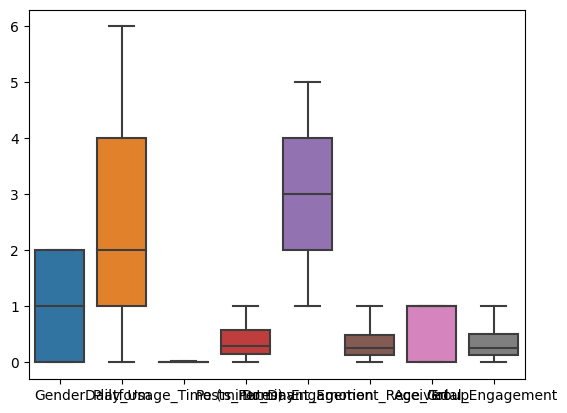

In [39]:
sns.boxplot(df_combined)

In [40]:
df_combined

,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Dominant_Emotion,Engagement_Received,Age_Group,Total_Engagement
1,0,1,0.008333,0.285714,3,0.335664,0,0.280899
5,2,0,0.002083,0.142857,4,0.090909,0,0.129213
7,0,1,0.016667,1.000000,1,0.860140,1,0.915730
9,1,2,0.000521,0.000000,2,0.000000,1,0.000000
11,1,1,0.011458,0.428571,3,0.475524,0,0.466292
...,...,...,...,...,...,...,...,...
1989,1,1,0.011458,0.571429,1,0.615385,1,0.606742
1991,2,5,0.004687,0.428571,2,0.321678,1,0.303371
1993,0,0,0.003125,0.000000,4,0.090909,0,0.073034
1995,1,6,0.007292,0.285714,3,0.475524,1,0.466292


In [41]:
df_combined.corr()

,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Dominant_Emotion,Engagement_Received,Age_Group,Total_Engagement
Gender,1.000000,-0.215511,-0.379255,-0.370819,0.033307,-0.418059,0.008263,-0.411749
Platform,-0.215511,1.000000,-0.227563,-0.111202,0.100829,-0.133977,-0.056431,-0.128682
Daily_Usage_Time (minutes),-0.379255,-0.227563,1.000000,0.905473,-0.060187,0.949841,0.026557,0.956206
Posts_Per_Day,-0.370819,-0.111202,0.905473,1.000000,0.037998,0.936142,-0.068435,0.937411
Dominant_Emotion,0.033307,0.100829,-0.060187,0.037998,1.000000,-0.040182,-0.291137,-0.043212
Engagement_Received,-0.418059,-0.133977,0.949841,0.936142,-0.040182,1.000000,-0.011239,0.996921
Age_Group,0.008263,-0.056431,0.026557,-0.068435,-0.291137,-0.011239,1.000000,0.000835
Total_Engagement,-0.411749,-0.128682,0.956206,0.937411,-0.043212,0.996921,0.000835,1.000000


In [42]:
df_combined = df_combined[df_combined["Dominant_Emotion"] != 6]


In [43]:
df_combined.shape

(870, 8)

In [44]:
df_test.shape

(146, 8)

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Features and target
X_train = df_combined.drop(columns=["Dominant_Emotion"])
y_train = df_combined["Dominant_Emotion"]
X_val = df_test.drop(columns=["Dominant_Emotion"])
y_val = df_test["Dominant_Emotion"]

# Parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Define base model
rf = RandomForestClassifier(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=1, scoring='f1_weighted')

# Fit on training data
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters found:", grid_search.best_params_)

# Evaluate on validation set
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_val)
print("\nValidation Set Performance:\n")
print(classification_report(y_val, y_pred))


Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}

Validation Set Performance:

              precision    recall  f1-score   support

           1       0.03      0.07      0.04        14
           2       0.09      0.06      0.08        31
           3       0.00      0.00      0.00        18
           4       0.03      0.04      0.03        28
           5       0.03      0.03      0.03        30
           6       0.00      0.00      0.00        25

    accuracy                           0.03       146
   macro avg       0.03      0.03      0.03       146
weighted avg       0.04      0.03      0.03       146



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [46]:
pip install optuna


Note: you may need to restart the kernel to use updated packages.


In [47]:
import optuna
from optuna.integration import OptunaSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, f1_score
import pandas as pd

# Prepare data
X_train = df_combined.drop(columns=["Dominant_Emotion"])
y_train = df_combined["Dominant_Emotion"]
X_val = df_test.drop(columns=["Dominant_Emotion"])
y_val = df_test["Dominant_Emotion"]

# Define the objective function with multiple classifiers
def objective(trial):
    classifier_name = trial.suggest_categorical("classifier", ["RandomForest", "GradientBoosting", "LinearSVC", "DecisionTree"])
    
    if classifier_name == "RandomForest":
        classifier_obj = RandomForestClassifier(
            n_estimators=trial.suggest_int("n_estimators", 50, 300),
            max_depth=trial.suggest_int("max_depth", 2, 20),
            random_state=42
        )
    elif classifier_name == "GradientBoosting":
        classifier_obj = GradientBoostingClassifier(
            n_estimators=trial.suggest_int("n_estimators", 50, 300),
            learning_rate=trial.suggest_float("learning_rate", 0.01, 0.3),
            max_depth=trial.suggest_int("max_depth", 2, 10),
            random_state=42
        )
    elif classifier_name == "LinearSVC":
        classifier_obj = LinearSVC(
            C=trial.suggest_float("C", 0.01, 10),
            max_iter=5000,
            random_state=42
        )
    else:  # DecisionTree
        classifier_obj = DecisionTreeClassifier(
            max_depth=trial.suggest_int("max_depth", 2, 20),
            min_samples_split=trial.suggest_int("min_samples_split", 2, 10),
            random_state=42
        )
    
    # Use pipeline if needed (e.g., LinearSVC benefits from scaling)
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('clf', classifier_obj)
    ])

    pipeline.fit(X_train, y_train)
    preds = pipeline.predict(X_val)
    return f1_score(y_val, preds, average="weighted")

# Run Optuna
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

# Display best result
print("Best classifier and parameters:", study.best_params)


[I 2025-04-04 11:02:21,939] A new study created in memory with name: no-name-f1abbe5b-40bd-4077-8c71-3716e33e8f6d
[I 2025-04-04 11:02:27,545] Trial 0 finished with value: 0.051557597682034044 and parameters: {'classifier': 'GradientBoosting', 'n_estimators': 265, 'learning_rate': 0.017065550158871224, 'max_depth': 6}. Best is trial 0 with value: 0.051557597682034044.
[I 2025-04-04 11:02:28,167] Trial 1 finished with value: 0.017526669369922337 and parameters: {'classifier': 'RandomForest', 'n_estimators': 290, 'max_depth': 15}. Best is trial 0 with value: 0.051557597682034044.
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
[I 2025-04-04 11:02:28,741] Trial 2 finished with value: 0.07509282393630025 and parameters: {'classifier': 'LinearSVC', 'C': 4.734090686962767}. Best is trial 2 with value: 0.07509282

Best classifier and parameters: {'classifier': 'DecisionTree', 'max_depth': 8, 'min_samples_split': 2}


In [48]:
from sklearn.metrics import accuracy_score

# Assuming `study` is your Optuna study object
best_params = study.best_trial.params

# Build model using best parameters
if best_params['classifier'] == 'DecisionTree':
    from sklearn.tree import DecisionTreeClassifier
    model = DecisionTreeClassifier(
        max_depth=best_params['max_depth'],
        min_samples_split=best_params['min_samples_split']
    )

# Fit on train data
model.fit(X_train, y_train)

# Predict on validation or test set
y_pred = model.predict(X_val)  # or X_test if you have a separate test set

# Compute accuracy
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.1232876712328767


In [64]:
pip install h2o

Note: you may need to restart the kernel to use updated packages.


In [66]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()
# Convert Pandas DataFrame to H2O Frame
hf_train = h2o.H2OFrame(df_combined)
hf_test = h2o.H2OFrame(df_test)


Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.25" 2024-10-15; OpenJDK Runtime Environment (build 11.0.25+9-post-Ubuntu-1ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.25+9-post-Ubuntu-1ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmps1m2n9f3
  JVM stdout: /tmp/tmps1m2n9f3/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmps1m2n9f3/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.6
H2O_cluster_version_age:,5 months and 2 days
H2O_cluster_name:,H2O_from_python_unknownUser_z0c2r7
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,7.500 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [67]:
target = "Dominant_Emotion"
features = [col for col in hf_train.columns if col != target]

# Ensure the target column is categorical for classification
hf_train[target] = hf_train[target].asfactor()
hf_test[target] = hf_test[target].asfactor()


In [68]:
target = "Dominant_Emotion"
features = [col for col in hf_train.columns if col != target]

# Ensure the target column is categorical for classification
hf_train[target] = hf_train[target].asfactor()
hf_test[target] = hf_test[target].asfactor()


In [69]:
aml = H2OAutoML(
    max_models=20,        # Number of models to train
    seed=42,              # Set seed for reproducibility
    max_runtime_secs=600  # Limit training time
)
aml.train(x=features, y=target, training_frame=hf_train)


AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_grid_1_AutoML_1_20250404_111023_model_2


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    78                 390                         190840                 6            11           10.6359       12            41            34.2949

ModelMetricsMultinomial: gbm
** Reported on train data. **

MSE: 0.0010774340771781015
RMSE: 0.032824290962305665
LogLoss: 0.004516542608874808
Mean Per-Class Error: 0.0014285714285714286
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
1    2    3    4    5    Error       Rate
---  ---  ---  ---  ---  ----------  -------
170  0    0    0    0    0           0 / 170
0    139  0    0    1    0.00714286  1 / 140
0    0    200  0    0    0           0 / 200
0    0    0    200  0    0           0 / 200
0    0    0    0    160  0           0 / 160
170  139  200  200  161  0.00114943  1 / 870

Top-5 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.998851
2    1
3    1
4    1
5    1

ModelMetricsMultinomial: gbm
** Reported on cross-validation data. **

MSE: 0.015795695338303963
RMSE: 0.12568092670848652
LogLoss: 0.059827110565033724
Mean Per-Class Error: 0.01888655462184874
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
1    2    3    4    5    Error      Rate
---  ---  ---  ---  ---  ---------  --------
167  2    0    1    0    0.0176471  3 / 170
0    138  0    0    2    0.0142857  2 / 140
2    0    195  2    1    0.025      5 / 200
2    3    0    195  0    0.025      5 / 200
1    0    0    1    158  0.0125     2 / 160
172  143  195  199  161  0.0195402  17 / 870

Top-5 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.98046
2    0.994253
3    0.996552
4    0.99885
5    1

Cross-Validation Metrics Summary: 
                         mean       sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
-----------------------  ---------  ----------  ------------  ------------  ------------  ------------  ------------
accuracy                 0.98046    0.0119175   0.971264      0.965517      0.994253      0.988506      0.982759
aic                      nan        0           nan           nan           nan           nan           nan
auc                      nan        0           nan           nan           nan           nan           nan
err                      0.0195402  0.0119175   0.0287356     0.0344828     0.00574713    0.0114943     0.0172414
err_count                3.4        2.07364     5             6             1             2             3
loglikelihood            nan        0           nan           nan           nan           nan           nan
logloss                  0.0610368  0.0361725   0.0933555     0.106348      0.026158      0.0413613     0.0379607
max_per_class_error      0.0555252  0.0216885   0.075         0.075         0.0294118     0.0357143     0.0625
mean_per_class_accuracy  0.981292   0.0100418   0.97375       0.969118      0.994118      0.986975      0.9825
mean_

In [70]:
leaderboard = aml.leaderboard
print(leaderboard)


model_id                                           mean_per_class_error    logloss      rmse        mse
GBM_grid_1_AutoML_1_20250404_111023_model_2                   0.0188866  0.0598271  0.125681  0.0157957
GBM_5_AutoML_1_20250404_111023                                0.0191366  0.0788831  0.136513  0.0186359
GBM_grid_1_AutoML_1_20250404_111023_model_1                   0.0193109  0.0776276  0.1404    0.019712
GBM_2_AutoML_1_20250404_111023                                0.0199874  0.0677048  0.130872  0.0171275
XGBoost_3_AutoML_1_20250404_111023                            0.0208866  0.0930955  0.144461  0.0208689
GBM_4_AutoML_1_20250404_111023                                0.0222374  0.0644369  0.134077  0.0179765
XGBoost_grid_1_AutoML_1_20250404_111023_model_2               0.0232374  0.0741837  0.145396  0.0211401
GBM_3_AutoML_1_20250404_111023                                0.0232374  0.0757074  0.142498  0.0203057
DRF_1_AutoML_1_20250404_111023                                0.0

In [71]:
predictions = aml.leader.predict(hf_test)


gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [72]:
pred_df = predictions.as_data_frame()
print(pred_df.head())


   predict        p1        p2        p3        p4        p5
0        3  0.000095  0.000004  0.999859  0.000021  0.000021
1        3  0.000459  0.000013  0.999428  0.000068  0.000031
2        2  0.282190  0.699266  0.000372  0.002300  0.015872
3        1  0.999537  0.000023  0.000236  0.000144  0.000060
4        1  0.999537  0.000023  0.000236  0.000144  0.000060


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [73]:
from sklearn.metrics import f1_score, accuracy_score

# Convert H2O predictions to NumPy
y_test_pred = pred_df.iloc[:, 0].values  # Assuming first column contains predicted labels

# Convert actual labels from H2O Frame to NumPy
y_test_actual = hf_test[target].as_data_frame().values.flatten()

# Compute scores
accuracy = accuracy_score(y_test_actual, y_test_pred)
f1 = f1_score(y_test_actual, y_test_pred, average="weighted")

print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")


Accuracy: 0.0479
F1 Score: 0.0439


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [49]:
df_tst=pd.read_excel("/kaggle/input/prob2-cummins/Social Media Usage - Test_updated.xlsm")

In [50]:
df_tst.dropna(inplace=True)

In [51]:
df_tst.drop('User_ID',axis=1)

,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
1,27.0,Female,Snapchat,120.0,4.0,40.0,18.0,22.0,Neutral
3,21.0,Non-binary,Snapchat,60.0,1.0,18.0,7.0,12.0,Neutral
5,28.0,Non-binary,Snapchat,115.0,3.0,38.0,18.0,27.0,Anxiety
7,27.0,Male,Telegram,105.0,3.0,48.0,20.0,28.0,Anxiety
9,21.0,Non-binary,Facebook,55.0,3.0,17.0,7.0,12.0,Neutral
...,...,...,...,...,...,...,...,...,...
197,22.0,Male,Twitter,70.0,1.0,20.0,5.0,22.0,Neutral
199,33.0,Male,LinkedIn,85.0,4.0,35.0,18.0,18.0,Boredom
201,24.0,Non-binary,Facebook,110.0,6.0,35.0,23.0,25.0,Sadness
203,24.0,Male,Telegram,75.0,3.0,37.0,16.0,22.0,Neutral


In [52]:
df_tst["Engagement_Received"] = df_tst["Likes_Received_Per_Day"] + df_tst["Comments_Received_Per_Day"]


In [53]:
df_tst

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion,Engagement_Received
1,500.0,27.0,Female,Snapchat,120.0,4.0,40.0,18.0,22.0,Neutral,58.0
3,488.0,21.0,Non-binary,Snapchat,60.0,1.0,18.0,7.0,12.0,Neutral,25.0
5,776.0,28.0,Non-binary,Snapchat,115.0,3.0,38.0,18.0,27.0,Anxiety,56.0
7,869.0,27.0,Male,Telegram,105.0,3.0,48.0,20.0,28.0,Anxiety,68.0
9,573.0,21.0,Non-binary,Facebook,55.0,3.0,17.0,7.0,12.0,Neutral,24.0
...,...,...,...,...,...,...,...,...,...,...,...
197,184.0,22.0,Male,Twitter,70.0,1.0,20.0,5.0,22.0,Neutral,25.0
199,896.0,33.0,Male,LinkedIn,85.0,4.0,35.0,18.0,18.0,Boredom,53.0
201,708.0,24.0,Non-binary,Facebook,110.0,6.0,35.0,23.0,25.0,Sadness,58.0
203,993.0,24.0,Male,Telegram,75.0,3.0,37.0,16.0,22.0,Neutral,53.0


In [54]:
# Create binary label: 0 if age between 18 and 24, else 1
# df_tst["Age_Binary_Label"] = df_tst["Age"].apply(lambda x: 0 if 18 <= x <= 24 else 1)


In [55]:
df_tst["Total_Engagement"] = (
    df_tst["Likes_Received_Per_Day"] +
    df_tst["Comments_Received_Per_Day"] +
    df_tst["Messages_Sent_Per_Day"]
)


In [56]:
columns_to_drop = ["Likes_Received_Per_Day", "Comments_Received_Per_Day", "Messages_Sent_Per_Day"]

df_tst.drop(columns=columns_to_drop, inplace=True)


In [57]:
df_tst.drop(['User_ID','Age'],axis=1,inplace=True)

In [58]:
df_tst["Daily_Usage_Time (minutes)"]=df_tst["Daily_Usage_Time (minutes)"]/60

In [59]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Columns to normalize
cols_to_normalize = ["Engagement_Received", "Total_Engagement"]

# Apply normalization
df_tst[cols_to_normalize] = scaler.fit_transform(df_tst[cols_to_normalize])


In [60]:
df_tst

,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Dominant_Emotion,Engagement_Received,Total_Engagement
1,Female,Snapchat,2.000000,4.0,Neutral,0.356643,0.353933
3,Non-binary,Snapchat,1.000000,1.0,Neutral,0.125874,0.112360
5,Non-binary,Snapchat,1.916667,3.0,Anxiety,0.342657,0.370787
7,Male,Telegram,1.750000,3.0,Anxiety,0.426573,0.443820
9,Non-binary,Facebook,0.916667,3.0,Neutral,0.118881,0.106742
...,...,...,...,...,...,...,...
197,Male,Twitter,1.166667,1.0,Neutral,0.125874,0.168539
199,Male,LinkedIn,1.416667,4.0,Boredom,0.321678,0.303371
201,Non-binary,Facebook,1.833333,6.0,Sadness,0.356643,0.370787
203,Male,Telegram,1.250000,3.0,Neutral,0.321678,0.325843


In [61]:
df_tst

,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Dominant_Emotion,Engagement_Received,Total_Engagement
1,Female,Snapchat,2.000000,4.0,Neutral,0.356643,0.353933
3,Non-binary,Snapchat,1.000000,1.0,Neutral,0.125874,0.112360
5,Non-binary,Snapchat,1.916667,3.0,Anxiety,0.342657,0.370787
7,Male,Telegram,1.750000,3.0,Anxiety,0.426573,0.443820
9,Non-binary,Facebook,0.916667,3.0,Neutral,0.118881,0.106742
...,...,...,...,...,...,...,...
197,Male,Twitter,1.166667,1.0,Neutral,0.125874,0.168539
199,Male,LinkedIn,1.416667,4.0,Boredom,0.321678,0.303371
201,Non-binary,Facebook,1.833333,6.0,Sadness,0.356643,0.370787
203,Male,Telegram,1.250000,3.0,Neutral,0.321678,0.325843


In [62]:
import optuna
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, f1_score
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Prepare data
X = df_combined.drop(columns=["Dominant_Emotion"])
y = df_combined["Dominant_Emotion"]

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Define the objective function with multiple classifiers
def objective(trial):
    classifier_name = trial.suggest_categorical(
        "classifier", ["RandomForest", "GradientBoosting", "LinearSVC", "DecisionTree"]
    )

    if classifier_name == "RandomForest":
        classifier_obj = RandomForestClassifier(
            n_estimators=trial.suggest_int("n_estimators", 50, 300),
            max_depth=trial.suggest_int("max_depth", 2, 20),
            random_state=42
        )
    elif classifier_name == "GradientBoosting":
        classifier_obj = GradientBoostingClassifier(
            n_estimators=trial.suggest_int("n_estimators", 50, 400),
            learning_rate=trial.suggest_float("learning_rate", 0.01, 0.3),
            max_depth=trial.suggest_int("max_depth", 2, 10),
            random_state=42
        )
    elif classifier_name == "LinearSVC":
        classifier_obj = LinearSVC(
            C=trial.suggest_float("C", 0.01, 10),
            max_iter=5000,
            random_state=42
        )
    else:  # DecisionTree
        classifier_obj = DecisionTreeClassifier(
            max_depth=trial.suggest_int("max_depth", 2, 20),
            min_samples_split=trial.suggest_int("min_samples_split", 2, 10),
            random_state=42
        )

    # Pipeline (scaler needed especially for LinearSVC)
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('clf', classifier_obj)
    ])

    pipeline.fit(X_train, y_train)
    preds = pipeline.predict(X_val)
    return f1_score(y_val, preds, average="weighted")

# Run Optuna
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

# Output best results
print("✅ Best classifier and parameters:", study.best_params)


[I 2025-04-04 11:02:45,251] A new study created in memory with name: no-name-bdc3e7a8-a763-4e23-8366-6a9e2353e40a
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
[I 2025-04-04 11:02:45,376] Trial 0 finished with value: 0.5896469865023182 and parameters: {'classifier': 'LinearSVC', 'C': 1.211826958148489}. Best is trial 0 with value: 0.5896469865023182.
[I 2025-04-04 11:02:47,800] Trial 1 finished with value: 1.0 and parameters: {'classifier': 'GradientBoosting', 'n_estimators': 285, 'learning_rate': 0.19189859997051636, 'max_depth': 4}. Best is trial 1 with value: 1.0.
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
[I 2025-

✅ Best classifier and parameters: {'classifier': 'GradientBoosting', 'n_estimators': 285, 'learning_rate': 0.19189859997051636, 'max_depth': 4}


In [63]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from tabulate import tabulate

# 1️⃣ Define Models
models = {
    "ExtraTrees": ExtraTreesClassifier(n_estimators=100, random_state=42),
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "GradientBoosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "LibLinear_SVC": LinearSVC(random_state=42, max_iter=5000)
}

# 2️⃣ Prepare Data
X_train = df_combined.drop(columns=["Dominant_Emotion"])  # Features
y_train= df_combined["Dominant_Emotion"]  # Target

X_test=df_test.drop(columns=["Dominant_Emotion"])
y_test =df_test["Dominant_Emotion"]
# 3️⃣ Train and Evaluate Models
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Compute Metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="weighted")
    precision = precision_score(y_test, y_pred, average="weighted")
    recall = recall_score(y_test, y_pred, average="weighted")

    # Store results
    results.append([name, accuracy, f1, precision, recall])

# 4️⃣ Create DataFrame
df_results = pd.DataFrame(results, columns=["Model Name", "Accuracy", "F1 Score", "Precision", "Recall"])

# 5️⃣ Pretty Print Table
print(tabulate(df_results, headers="keys", tablefmt="fancy_grid", showindex=False))


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

╒══════════════════╤════════════╤════════════╤═════════════╤═══════════╕
│ Model Name       │   Accuracy │   F1 Score │   Precision │    Recall │
╞══════════════════╪════════════╪════════════╪═════════════╪═══════════╡
│ ExtraTrees       │  0.0616438 │  0.0407946 │   0.0346785 │ 0.0616438 │
├──────────────────┼────────────┼────────────┼─────────────┼───────────┤
│ RandomForest     │  0.0410959 │  0.0318908 │   0.0275529 │ 0.0410959 │
├──────────────────┼────────────┼────────────┼─────────────┼───────────┤
│ GradientBoosting │  0.0479452 │  0.0367223 │   0.0335043 │ 0.0479452 │
├──────────────────┼────────────┼────────────┼─────────────┼───────────┤
│ DecisionTree     │  0.0890411 │  0.0705049 │   0.0691779 │ 0.0890411 │
├──────────────────┼────────────┼────────────┼─────────────┼───────────┤
│ LibLinear_SVC    │  0.130137  │  0.127264  │   0.166104  │ 0.130137  │
╘══════════════════╧════════════╧════════════╧═════════════╧═══════════╛


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
